In [22]:
import pandas as pd

In [23]:
temperature = pd.read_csv("температура.csv", sep=";")
characteristics = pd.read_csv("характеристики_домов.csv", sep=";")
volume_of_heat = pd.read_csv("объём_теплоты.csv", sep=";")

In [24]:
print(f'temperature: {temperature.size}, characteristics: {characteristics.size}, volume_of_heat: {volume_of_heat.size}')

temperature: 50886, characteristics: 5076, volume_of_heat: 2806700


## Model temperature

In [25]:
temperature.head(7)

date_start                 date_end              temp  \
0  2017-10-01 00:00:00.000  2017-10-01 03:00:00.000  5,54000244140627   
1  2017-10-01 03:00:00.000  2017-10-01 06:00:00.000  5,86000976562502   
2  2017-10-01 06:00:00.000  2017-10-01 09:00:00.000  6,60000000000002   
3  2017-10-01 09:00:00.000  2017-10-01 12:00:00.000  9,52999267578127   
4  2017-10-01 12:00:00.000  2017-10-01 15:00:00.000  9,55001220703127   
5  2017-10-01 15:00:00.000  2017-10-01 18:00:00.000  6,10000000000002   
6  2017-10-01 18:00:00.000  2017-10-01 21:00:00.000  4,96999511718752   

           temp_max          temp_min  humidity  
0  5,54000244140627  4,86800537109377       100  
1  5,86000976562502  4,95900878906252       100  
2  6,60000000000002  5,76400146484377       100  
3  9,52999267578127  7,83098754882815        95  
4  9,55001220703127  8,61800537109377        87  
5  6,58999023437502  6,10000000000002        89  
6  5,43999633789065  4,96999511718752        91

In [26]:
temperature = temperature.drop(['temp_max', 'temp_min'], axis=1)

In [27]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8481 entries, 0 to 8480
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date_start  8481 non-null   object
 1   date_end    8481 non-null   object
 2   temp        8481 non-null   object
 3   humidity    8481 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 265.2+ KB


In [28]:
temperature["temp"] = temperature["temp"].str.replace(',', '.', regex=False)

In [29]:
temperature['temp'] = temperature['temp'].astype('float32')

In [30]:
temperature['date_start'] = pd.to_datetime(temperature['date_start'], format='mixed').dt.strftime('%m.%d.%Y')
temperature['date_end'] = pd.to_datetime(temperature['date_end'], format='mixed').dt.strftime('%m.%d.%Y')

In [31]:
temperature['date_start'] = temperature['date_start'].astype('datetime64[ns]')
temperature['date_end'] = temperature['date_end'].astype('datetime64[ns]')

In [32]:
import datetime

In [33]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8481 entries, 0 to 8480
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date_start  8481 non-null   datetime64[ns]
 1   date_end    8481 non-null   datetime64[ns]
 2   temp        8481 non-null   float32       
 3   humidity    8481 non-null   int64         
dtypes: datetime64[ns](2), float32(1), int64(1)
memory usage: 232.0 KB


In [34]:
temperature.head(2)

date_start   date_end      temp  humidity
0 2017-10-01 2017-10-01  5.540002       100
1 2017-10-01 2017-10-01  5.860010       100

In [35]:
temperature = temperature.drop('date_end', axis=1)

In [36]:
temperature_copy = temperature.copy()

In [37]:
temperature_copy.head(5)

date_start      temp  humidity
0 2017-10-01  5.540002       100
1 2017-10-01  5.860010       100
2 2017-10-01  6.600000       100
3 2017-10-01  9.529993        95
4 2017-10-01  9.550013        87

In [38]:
temperature_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8481 entries, 0 to 8480
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date_start  8481 non-null   datetime64[ns]
 1   temp        8481 non-null   float32       
 2   humidity    8481 non-null   int64         
dtypes: datetime64[ns](1), float32(1), int64(1)
memory usage: 165.8 KB


In [39]:
temperature_copy.head(10)

date_start      temp  humidity
0 2017-10-01  5.540002       100
1 2017-10-01  5.860010       100
2 2017-10-01  6.600000       100
3 2017-10-01  9.529993        95
4 2017-10-01  9.550013        87
5 2017-10-01  6.100000        89
6 2017-10-01  4.969995        91
7 2017-10-01  3.170007       100
8 2017-10-02  3.249994       100
9 2017-10-02  2.129999        98

In [40]:
import seaborn as sns

<Axes: >

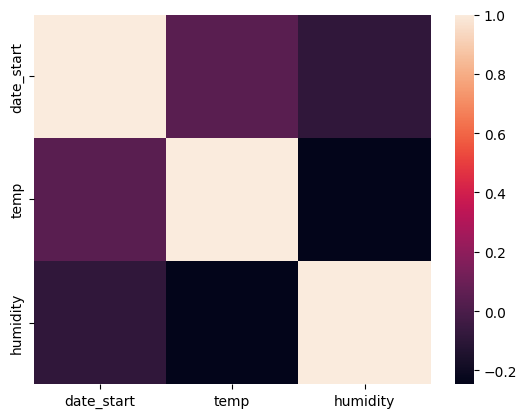

In [41]:
corr = temperature.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [42]:
temperature_copy = temperature_copy.rename(columns={'date_start' : 'date'})

In [43]:
temperature_copy.head(2)

date      temp  humidity
0 2017-10-01  5.540002       100
1 2017-10-01  5.860010       100

In [44]:
temperature_copy = temperature_copy.groupby('date').agg({'temp': 'mean', 'humidity': 'mean'})

In [45]:
temperature_copy = temperature_copy.reset_index()

In [46]:
temperature_copy.head(7)

date       temp  humidity
0 2017-10-01   6.415002    95.250
1 2017-10-02   4.072500    84.250
2 2017-10-03   6.515005    85.375
3 2017-10-04   3.240003    86.875
4 2017-10-05   8.136244    78.875
5 2017-10-06   9.822504    88.375
6 2017-10-07  11.366243    95.500

In [47]:
temperature_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1060 non-null   datetime64[ns]
 1   temp      1060 non-null   float32       
 2   humidity  1060 non-null   float64       
dtypes: datetime64[ns](1), float32(1), float64(1)
memory usage: 20.8 KB


In [48]:
temperature_copy['working_year'] = temperature_copy.date.dt.year
temperature_copy['working_month'] = temperature_copy.date.dt.month
temperature_copy['working_day'] = temperature_copy.date.dt.day

In [49]:
temperature_copy.head(2)

date      temp  humidity  working_year  working_month  working_day
0 2017-10-01  6.415002     95.25          2017             10            1
1 2017-10-02  4.072500     84.25          2017             10            2

## Model characteristics

In [50]:
characteristics.head(2)

address_uuid  build_year  floor_number  \
0  82c2ad6e-27db-4541-8e5d-00163bbe622e      1976.0           5.0   
1  e68f3476-3f10-4374-b682-00de840dae3c      1978.0           5.0   

   residential_area wall_type  roof_area_total  roof_area_metal  \
0           4621.25     Блоки          1234.00              0.0   
1           2746.54  ж/б блок          1078.55              0.0   

   roof_area_web  roof_area_piece_goods  
0        1234.00                    0.0  
1        1078.55                    0.0

In [51]:
characteristics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   address_uuid           564 non-null    object 
 1   build_year             563 non-null    float64
 2   floor_number           548 non-null    float64
 3   residential_area       546 non-null    float64
 4   wall_type              551 non-null    object 
 5   roof_area_total        536 non-null    float64
 6   roof_area_metal        542 non-null    float64
 7   roof_area_web          543 non-null    float64
 8   roof_area_piece_goods  542 non-null    float64
dtypes: float64(7), object(2)
memory usage: 39.8+ KB


In [52]:
characteristics = characteristics.drop_duplicates(subset=['address_uuid'])

In [53]:
characteristics['address_uuid'].duplicated().sum()

0

In [54]:
characteristics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 556 entries, 0 to 563
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   address_uuid           556 non-null    object 
 1   build_year             555 non-null    float64
 2   floor_number           548 non-null    float64
 3   residential_area       546 non-null    float64
 4   wall_type              545 non-null    object 
 5   roof_area_total        530 non-null    float64
 6   roof_area_metal        542 non-null    float64
 7   roof_area_web          543 non-null    float64
 8   roof_area_piece_goods  542 non-null    float64
dtypes: float64(7), object(2)
memory usage: 43.4+ KB


In [55]:
characteristics.isna().sum()

address_uuid              0
build_year                1
floor_number              8
residential_area         10
wall_type                11
roof_area_total          26
roof_area_metal          14
roof_area_web            13
roof_area_piece_goods    14
dtype: int64

## Model volume_of_heat

In [56]:
volume_of_heat.head(5)

address_uuid        date  value  is_unreliable
0  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5  2017-10-01  1.013              0
1  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5  2017-10-02  1.071              0
2  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5  2017-10-03  1.071              1
3  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5  2017-10-04  1.087              0
4  0005a1de-b1a0-4c0c-9712-bcc2ff4a6bd5  2017-10-05  1.105              0

In [57]:
volume_of_heat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701675 entries, 0 to 701674
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   address_uuid   701675 non-null  object 
 1   date           701675 non-null  object 
 2   value          701675 non-null  float64
 3   is_unreliable  701675 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 21.4+ MB


In [58]:
volume_of_heat.isna().sum()

address_uuid     0
date             0
value            0
is_unreliable    0
dtype: int64

## Full dataframe

In [59]:
merge_address = characteristics.merge(volume_of_heat, how='outer', left_on='address_uuid', right_on='address_uuid')

In [60]:
merge_address.head(2)

address_uuid  build_year  floor_number  \
0  82c2ad6e-27db-4541-8e5d-00163bbe622e      1976.0           5.0   
1  82c2ad6e-27db-4541-8e5d-00163bbe622e      1976.0           5.0   

   residential_area wall_type  roof_area_total  roof_area_metal  \
0           4621.25     Блоки           1234.0              0.0   
1           4621.25     Блоки           1234.0              0.0   

   roof_area_web  roof_area_piece_goods        date  value  is_unreliable  
0         1234.0                    0.0  2017-10-01  5.372            0.0  
1         1234.0                    0.0  2017-10-02  5.182            0.0

In [61]:
merge_address.isna().sum()

address_uuid                  0
build_year               137762
floor_number             143886
residential_area         145975
wall_type                146694
roof_area_total          161736
roof_area_metal          149861
roof_area_web            148800
roof_area_piece_goods    149861
date                          2
value                         2
is_unreliable                 2
dtype: int64

In [62]:
merge_address = merge_address.dropna()

In [63]:
merge_address.isna().sum()

address_uuid             0
build_year               0
floor_number             0
residential_area         0
wall_type                0
roof_area_total          0
roof_area_metal          0
roof_area_web            0
roof_area_piece_goods    0
date                     0
value                    0
is_unreliable            0
dtype: int64

In [64]:
merge_address.head(5)

address_uuid  build_year  floor_number  \
0  82c2ad6e-27db-4541-8e5d-00163bbe622e      1976.0           5.0   
1  82c2ad6e-27db-4541-8e5d-00163bbe622e      1976.0           5.0   
2  82c2ad6e-27db-4541-8e5d-00163bbe622e      1976.0           5.0   
3  82c2ad6e-27db-4541-8e5d-00163bbe622e      1976.0           5.0   
4  82c2ad6e-27db-4541-8e5d-00163bbe622e      1976.0           5.0   

   residential_area wall_type  roof_area_total  roof_area_metal  \
0           4621.25     Блоки           1234.0              0.0   
1           4621.25     Блоки           1234.0              0.0   
2           4621.25     Блоки           1234.0              0.0   
3           4621.25     Блоки           1234.0              0.0   
4           4621.25     Блоки           1234.0              0.0   

   roof_area_web  roof_area_piece_goods        date  value  is_unreliable  
0         1234.0                    0.0  2017-10-01  5.372            0.0  
1         1234.0                    0.0  2017-10-02  5.182            0.0  
2         1234.0                    0.0  2017-10-03  5.022            0.0  
3         1234.0                    0.0  2017-10-04  5.066            0.0  
4         1234.0                    0.0  2017-10-05  4.962            0.0

In [68]:
merge_address['date'] = merge_address['date'].astype('datetime64[ns]')

In [69]:
merge_address.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538883 entries, 0 to 564963
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   address_uuid           538883 non-null  object        
 1   build_year             538883 non-null  float64       
 2   floor_number           538883 non-null  float64       
 3   residential_area       538883 non-null  float64       
 4   wall_type              538883 non-null  object        
 5   roof_area_total        538883 non-null  float64       
 6   roof_area_metal        538883 non-null  float64       
 7   roof_area_web          538883 non-null  float64       
 8   roof_area_piece_goods  538883 non-null  float64       
 9   date                   538883 non-null  datetime64[ns]
 10  value                  538883 non-null  float64       
 11  is_unreliable          538883 non-null  float64       
dtypes: datetime64[ns](1), float64(9), object(2)
memor

In [70]:
merge_all = temperature_copy.merge(merge_address, how='outer', left_on='date', right_on='date')

In [71]:
merge_all.head(2)

date      temp  humidity  working_year  working_month  working_day  \
0 2017-10-01  6.415002     95.25        2017.0           10.0          1.0   
1 2017-10-01  6.415002     95.25        2017.0           10.0          1.0   

                           address_uuid  build_year  floor_number  \
0  82c2ad6e-27db-4541-8e5d-00163bbe622e      1976.0           5.0   
1  e68f3476-3f10-4374-b682-00de840dae3c      1978.0           5.0   

   residential_area wall_type  roof_area_total  roof_area_metal  \
0           4621.25     Блоки          1234.00              0.0   
1           2746.54  ж/б блок          1078.55              0.0   

   roof_area_web  roof_area_piece_goods  value  is_unreliable  
0        1234.00                    0.0  5.372            0.0  
1        1078.55                    0.0  4.477            0.0

In [72]:
merge_all.isna().sum()

date                       0
temp                     526
humidity                 526
working_year             526
working_month            526
working_day              526
address_uuid               0
build_year                 0
floor_number               0
residential_area           0
wall_type                  0
roof_area_total            0
roof_area_metal            0
roof_area_web              0
roof_area_piece_goods      0
value                      0
is_unreliable              0
dtype: int64

In [73]:
merge_all = merge_all.dropna()

In [78]:
merge_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538357 entries, 0 to 538356
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   date                   538357 non-null  datetime64[ns]
 1   temp                   538357 non-null  float32       
 2   humidity               538357 non-null  float64       
 3   working_year           538357 non-null  float64       
 4   working_month          538357 non-null  float64       
 5   working_day            538357 non-null  float64       
 6   address_uuid           538357 non-null  object        
 7   build_year             538357 non-null  float64       
 8   floor_number           538357 non-null  float64       
 9   residential_area       538357 non-null  float64       
 10  wall_type              538357 non-null  object        
 11  roof_area_total        538357 non-null  float64       
 12  roof_area_metal        538357 non-null  float64  

In [ ]:
#from statsmodels.tsa.seasonal import seasonal_decompose
# посмотрим на данные в целом
#decomposed_df = seasonal_decompose(merge_all)
#decomposed_df.trend.plot(figsize=(20,5), xlabel='date', ylabel='orders', title='Trend [all time]');

In [103]:
merge_all.wall_type.unique()

array(['Блоки', 'ж/б блок', 'Кирпич', 'Панели железобетонные',
       'Шлакоблоки', 'Дерево', 'Брус'], dtype=object)

In [80]:
merge_all.head(2)

date      temp  humidity  working_year  working_month  working_day  \
0 2017-10-01  6.415002     95.25        2017.0           10.0          1.0   
1 2017-10-01  6.415002     95.25        2017.0           10.0          1.0   

                           address_uuid  build_year  floor_number  \
0  82c2ad6e-27db-4541-8e5d-00163bbe622e      1976.0           5.0   
1  e68f3476-3f10-4374-b682-00de840dae3c      1978.0           5.0   

   residential_area wall_type  roof_area_total  roof_area_metal  \
0           4621.25     Блоки          1234.00              0.0   
1           2746.54  ж/б блок          1078.55              0.0   

   roof_area_web  roof_area_piece_goods  value  is_unreliable  
0        1234.00                    0.0  5.372            0.0  
1        1078.55                    0.0  4.477            0.0

In [109]:
# Создадим выборки
X = merge_all.drop(['date', 'value', 'address_uuid', 'wall_type'], axis = 1)
y = merge_all['value']

In [115]:
from sklearn.tree import DecisionTreeClassifier  

In [110]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, TimeSeriesSplit

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12345, shuffle=False)

In [132]:
from sklearn.neighbors import KNeighborsClassifier 

In [125]:
param_grid = {
      'max_depth': range(1,11)}
tsscv = TimeSeriesSplit()

In [134]:
%%time
model_lr = KNeighborsClassifier()
model_lr.fit(X_train, y_train)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.